In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

C:\Users\a237938\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)

Bad key "text.kerning_factor" on line 4 in
C:\Users\a237938\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\a237938\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\a237938\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\a237938\Anaconda3\lib

1. Loading the credit card data

In [3]:
card_data = pd.read_csv('C:/Users/a237938/Desktop/programmingProjects/CreditCardFraud/archive/creditcard.csv')

In [4]:
card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
print ("how the data is structured/the shape of the data")
print (card_data.shape)
print (card_data.describe())

How many fraud and now fraud do we have? class 1 is fraud and 0 is not fraud

In [14]:
fraud = card_data[card_data['Class'] == 1]
valid = card_data[card_data['Class'] == 0]

outlier = len(fraud)/len(valid)

print('the outlier in percentage: ')
print("{:.4f}".format(outlier))

print('Fraud Cases: {}'.format(len(card_data[card_data['Class']==1])))
print('Valid Cases: {}'.format(len(card_data[card_data['Class']==0])))

#The data is not balanced for accurate training results, we need to balacne the data for furthure processing

the outlier in percentage: 
0.0017
Fraud Cases: 492
Valid Cases: 284315


In [17]:
print ('Amount details for fraud transaction')
fraud.Amount.describe()

Amount details for fraud transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
print ('Amount details for valid transaction')
valid.Amount.describe()

Amount details for valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

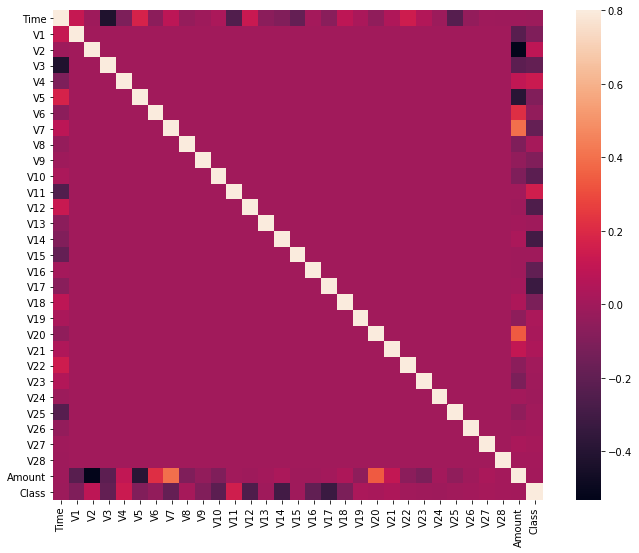

In [20]:
cormat = card_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cormat, vmax=.8, square=True)
plt.show()

deviding the data into input and output using X and Y 

In [41]:
x = card_data.drop(['Class'], axis=1)
y = card_data['Class']
print(x.shape)
print(y.shape)

#getting data values into an array for processing
xdata = x.values
ydata = y.values


(284807, 30)
(284807,)


we devide our datasets into training and testing group

In [45]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xdata, ydata, test_size = 0.2, random_state = 42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

#Prediction
yPred = rfc.predict (xTest)

In [50]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

fraudOutliers = len(fraud)
erros = (yPred != yTest).sum()
print("The model used is Random forrest classifier")

accuracyScore = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(accuracyScore))

precisionScore = precision_score(yTest, yPred)
print("The precision score is {}".format(precisionScore))

recallScore = recall_score(yTest, yPred)
print("The recall score is {}".format(recallScore))

f1 = f1_score(yTest, yPred)
print("The F1-score is {}".format(f1))\

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random forrest classifier
The accuracy is 0.9995786664794073
The precision score is 0.9743589743589743
The recall score is 0.7755102040816326
The F1-score is 0.8636363636363635
The Matthews correlation coefficient is 0.8690748763736589
